In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Данные взяты с https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [12]:
data = pd.read_csv("diabetes.csv")
print("Размерность данных:", data.shape)
print('_' * 100)
print(data.head())

Размерность данных: (768, 9)
____________________________________________________________________________________________________
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [13]:
print("\nПропущенные значения:\n", '_' * 100 + '\n', data.isnull().sum())


Пропущенные значения:
 ____________________________________________________________________________________________________
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
X = data.drop("Outcome", axis=1) # все колонки кроме "Outcome", признаки
y = data["Outcome"] # колонка "Outcome"; 0 — нет диабета, 1 — есть

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- test_size=0.2 - 20% данных для тестирования

- random_state=42 - для воспроизводимости результатов

- stratify=y - сохраняет пропорции классов (диабет/нет диабета) в обеих выборках

In [16]:
# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**StandardScaler** стандартизирует данные (среднее = 0, стандартное отклонение = 1)

fit_transform() вычисляет параметры масштабирования И применяет к обучающим данным, а transform() применяет те же параметры к тестовым данным (без пересчета)

In [ ]:
# Создание архитектуры нейронной сети
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\alisa\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Sequential** - последовательная модель

**Dense** - полносвязные слои:

- Первый слой: 16 нейронов, ReLU активация, input_shape определяет количество входных признаков

- Второй слой: 8 нейронов, ReLU

- Выходной слой: 1 нейрон, sigmoid (для бинарной классификации)

*relu* помогает сети изучать сложные закономерности

*sigmoid* преобразует выход в вероятность (0 = нет диабета, 1 = есть диабет)

In [18]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

- **optimizer=Adam()** - алгоритм обучения, который настраивает веса сети

- **learning_rate=0.001** - скорость обучения (шаг изменения весов)

- **loss='binary_crossentropy'** - функция потерь для бинарной классификации

- **metrics=['accuracy']** чтобы отслеживать точность предсказаний

In [19]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3523 - loss: 0.7870 - val_accuracy: 0.4065 - val_loss: 0.7089
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5173 - loss: 0.6959 - val_accuracy: 0.5772 - val_loss: 0.6691
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6497 - loss: 0.6692 - val_accuracy: 0.6911 - val_loss: 0.6497
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7332 - loss: 0.6536 - val_accuracy: 0.7398 - val_loss: 0.6345
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7597 - loss: 0.6412 - val_accuracy: 0.7967 - val_loss: 0.6223
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7699 - loss: 0.6290 - val_accuracy: 0.7967 - val_loss: 0.6094
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7739 - loss: 0.6183 - val_accuracy: 0.7886 - val_loss: 0.5972
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7821 - loss: 0.6083 - val_accuracy: 0.7886 - val_loss:

**epochs=50** - модель увидит все обучающие данные 50 раз

**batch_size=8** - модель обновляет веса после каждых 8 примеров

**validation_split=0.2** - то есть 20% обучающих данных используется для проверки во время обучения

**verbose=1** показывает прогресс обучения

**history** сохраняет историю обучения для построения графиков

In [20]:
# Предсказание и оценка
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


**model.predict(X_test)** получает вероятности для тестовых данных

Значенние **> 0.5**, то преобразует вероятности в бинарные предсказания:

- если вероятность > 0.5 → 1 (диабет)

- если вероятность ≤ 0.5 → 0 (нет диабета)

In [29]:
# Метрики качества
print("Общая точность предсказаний:", accuracy_score(y_test, y_pred))
print('_' * 100)
print("\nМатрица верных значений и ошибок:\n", confusion_matrix(y_test, y_pred))
print('_' * 100)
print("\nОтчет о классификации:\n", classification_report(y_test, y_pred))

Общая точность предсказаний: 0.7077922077922078
____________________________________________________________________________________________________

Матрица верных значений и ошибок:
 [[80 20]
 [25 29]]
____________________________________________________________________________________________________

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



**Матрица верных значений и ошибок** показывает:

- Правильные предсказания (по диагонали)

- Ошибки (вне диагонали)

**Отчет о классификации** - подробные метрики:

- *Precision* - сколько из предсказанных "диабет" действительно диабет

- *Recall* - сколько реальных случаев диабета мы нашли

- *F1-score* - баланс между Precision и Recall

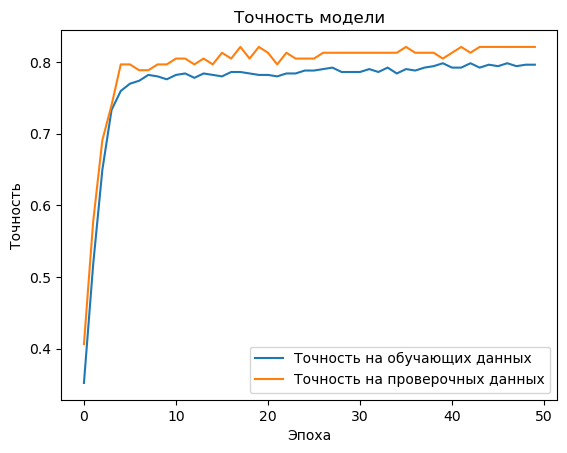

In [30]:
# График точности и потерь
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на проверочных данных')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()